In [ ]:
"""
What? How to select numerical input features

Feature selection is the process of identifying and selecting a subset of input 
features that are most relevant to the target variable.

There are 2 methods which are used depending on the input/output values:

[1] Pearson’s correlation coefficient: real-valued input and output data
[2] ANOVA F-test statistic and the mutual information statistic: are used whe 
    numerical input data and a categorical target variable (e.g. classification
    predictive modeling) 
"""

In [14]:
# Import python modules
from pylab import rcParams
from pandas import read_csv
from matplotlib import pyplot
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest

In [6]:
# Additional functions
def myPrint(string, c = "blue"):    
    """My version of the python-native print command.
    
    Print in bold and red tect
    """
    colorstr = "<span style='color:{}'>{}</span>".format(c, '**'+ string + '**' )    
    display(Markdown(colorstr))

def printPythonModuleVersion():    
    """printPythonModuleVersion
    Quickly list the python module versions
    """
    myPrint("Checking main python modules version")
    import scipy
    print('scipy: %s' % scipy.__version__)
    import numpy
    print('numpy: %s' % numpy.__version__)    
    import matplotlib
    print('matplotlib: %s' % matplotlib.__version__)    
    import pandas
    print('pandas: %s' % pandas.__version__)
    import statsmodels
    print('statsmodels: %s' % statsmodels.__version__) 
    import sklearn
    print('sklearn: %s' % sklearn.__version__)
    import xgboost
    print('xgboostn: %s' % xgboost.__version__)    

printPythonModuleVersion()

<span style='color:blue'>**Checking main python modules version**</span>

scipy: 1.5.4
numpy: 1.19.4
matplotlib: 3.3.2
pandas: 1.1.4
statsmodels: 0.12.1
sklearn: 0.23.2
xgboostn: 1.2.1


In [7]:
myPrint("Loading dataset and splitting")
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y

datasetPath = "../DATASETS/pima-indians-diabetes.csv"
# load the dataset
X, y = load_dataset(datasetPath)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) # summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

<span style='color:blue'>**Loading dataset and splitting**</span>

Train (514, 8) (514,)
Test (254, 8) (254,)


In [ ]:
"""
Numerical INPUT data and a categorical (class) target (OUTPUT) variable.

ANOVA is an acronym for analysis of variance and is a parametric statistical hypothesis 
test for determining whether the means from two or more samples of data (often three or 
more) come from the same distribution or not. An F-statistic, or F-test, is a class of 
statistical tests that calculate the ratio between variances values, such as the variance
from two different samples or the explained and unexplained variance by a statistical test,
like ANOVA.

What do we use it for? The results of this test can be used for feature selection where
those features that are independent of the target variable can be removed from the dataset.
"""

## ANOVA f-test feature selection for numerical data

Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


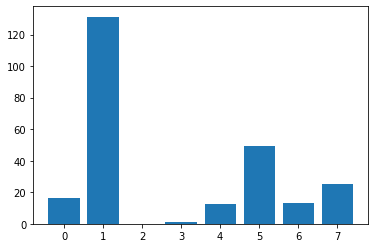

In [11]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    # The scikit-learn ML provides the ANOVA F-test in the f_classif() function.
    fs = SelectKBest(score_func = f_classif, k = 'all') 
    # learn relationship from training data 
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_) 
pyplot.show()    

## Mutual Information Feature Selection

In [ ]:
"""
Numerical INPUT data and a categorical (class) target (OUTPUT) variable.

Mutual information is calculated between two variables and measures the reduction in 
uncertainty for one variable given a known value of the other variable. 

What do we use it for? The results of this test can be used for feature selection where
those features that are independent of the target variable can be removed from the dataset.
"""

Feature 0: 0.047456
Feature 1: 0.093780
Feature 2: 0.018482
Feature 3: 0.050924
Feature 4: 0.063735
Feature 5: 0.074441
Feature 6: 0.017528
Feature 7: 0.026013


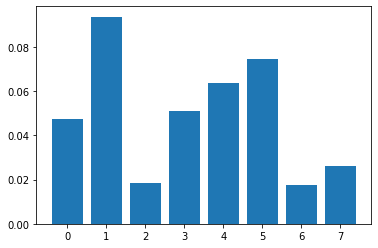

In [15]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all') # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

    # plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_) 
pyplot.show()